In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Import the NumPy library and use the alias 'np' for convenience
import numpy as np

# Import the Pandas library and use the alias 'pd' for convenience
import pandas as pd

# Import the 'copy' module, which provides functions for copying objects
import copy

# Import the 'OneHotEncoder' class from scikit-learn for categorical variable encoding
from sklearn.preprocessing import OneHotEncoder

# Import the 'MinMaxScaler' class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Import the 'PCA' class from scikit-learn for Principal Component Analysis (dimensionality reduction)
from sklearn.decomposition import PCA, KernelPCA

# Import the 'RandomUnderSampler' class from imbalanced-learn for under-sampling the majority class
from imblearn.under_sampling import RandomUnderSampler as under_sam

# Import various classes/functions for feature selection from scikit-learn
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# Import the 'GaussianNB' class from scikit-learn for implementing Gaussian Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

# Import the 'SVC' class from scikit-learn for implementing Support Vector Classifier
from sklearn.svm import SVC

# Import various metric functions for model evaluation from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score


In [2]:
# Load the train dataset from a CSV file 'KDDTrain+.csv' using Pandas, specifying comma as the separator and no header
df_train = pd.read_csv('KDDTrain+.csv', sep=",", header=None)

# Keep only the features columns and exclude the last column which contains labels
df_train = df_train[df_train.columns[:-1]]

# Load the titles (column names) from 'Field Names.csv' using Pandas
titles = pd.read_csv('Field Names.csv', header=None)

# Create a new label Series with the name 'label' and index 41
label = pd.Series(['label'], index=[41])

# Append the 'label' Series to the titles to include it as the last column name
titles = titles[0].append(label)

# Assign the updated titles list as the column names for the df_train DataFrame
df_train.columns = titles.to_list()

# Extract the 'label' column as the target variable 'y_train'
y_train = df_train['label']

# Drop the 'num_outbound_cmds' column from the df_train DataFrame
df_train = df_train.drop(['num_outbound_cmds'], axis=1)

# Create a copy of the original df_train DataFrame and store it in df_train_original
df_train_original = df_train.copy()

# Display the first few rows of the df_train_original DataFrame
df_train_original.head()


/var/folders/9t/qd3brwf508703bsjgljqcg2h0000gn/T/ipykernel_37280/3100743197.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titles = titles[0].append(label)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
# Load the test dataset from a text file 'KDDTest+.txt' using Pandas, specifying comma as the separator and no header
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None)

# Keep only the features columns and exclude the last column which contains labels
df_test = df_test[df_test.columns[:-1]]

# Assign the titles (column names) to the columns of the df_test DataFrame
df_test.columns = titles.to_list()

# Extract the 'label' column from the df_test DataFrame as the target variable 'y_test'
y_test = df_test['label']

# Drop the 'num_outbound_cmds' column from the df_test DataFrame
df_test = df_test.drop(['num_outbound_cmds'], axis=1)

# Create a copy of the original df_test DataFrame and store it in df_test_original
df_test_original = df_test.copy()

# Display the df_test_original DataFrame
df_test_original


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [4]:
# Create deep copies of the original training and test DataFrames using the 'copy' module
# This ensures that the original data remains unchanged and can be reused for different operations
df_train = copy.deepcopy(df_train_original)
df_test = copy.deepcopy(df_test_original)


In [5]:
# Create a list of attack types that are considered as Denial of Service (DOS) or probe attacks
dos_probe_list = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm', 'ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

# Convert the target variable 'y_train' into binary labels: 1 for DOS/probe attacks and 0 for others
y_train = np.array([1 if x in dos_probe_list else 0 for x in df_train['label']])

# Drop the 'label' column from the df_train DataFrame
df_train = df_train.drop(['label'], axis=1)

# Reset the index of the df_train DataFrame and drop the old index column
df_train = df_train.reset_index().drop(['index'], axis=1)

# Display the modified df_train DataFrame
df_train


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [6]:
# Drop columns 'protocol_type', 'service', and 'flag' from the training data as they are categorical features
X_train = df_train.drop(['protocol_type', 'service', 'flag'], axis=1)

# Calculate the mutual information between each feature in X_train and the target variable y_train
mutual_info = mutual_info_classif(X_train, y_train) 

# Convert the mutual_info array into a Pandas Series and set the index to column names
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

# Sort the mutual_info Series in descending order to understand feature importance based on correlation
mutual_info.sort_values(ascending=False)


src_bytes                      0.576658
dst_bytes                      0.436679
same_srv_rate                  0.379051
diff_srv_rate                  0.372300
dst_host_srv_count             0.329760
dst_host_same_srv_rate         0.321984
logged_in                      0.317023
dst_host_diff_srv_rate         0.294424
dst_host_serror_rate           0.292930
dst_host_srv_serror_rate       0.289658
serror_rate                    0.285675
srv_serror_rate                0.277382
count                          0.271627
dst_host_srv_diff_host_rate    0.194451
dst_host_count                 0.151381
dst_host_same_src_port_rate    0.124772
srv_diff_host_rate             0.095943
dst_host_srv_rerror_rate       0.067560
srv_count                      0.067524
rerror_rate                    0.043539
srv_rerror_rate                0.037497
dst_host_rerror_rate           0.037008
duration                       0.027899
hot                            0.008362
wrong_fragment                 0.005283


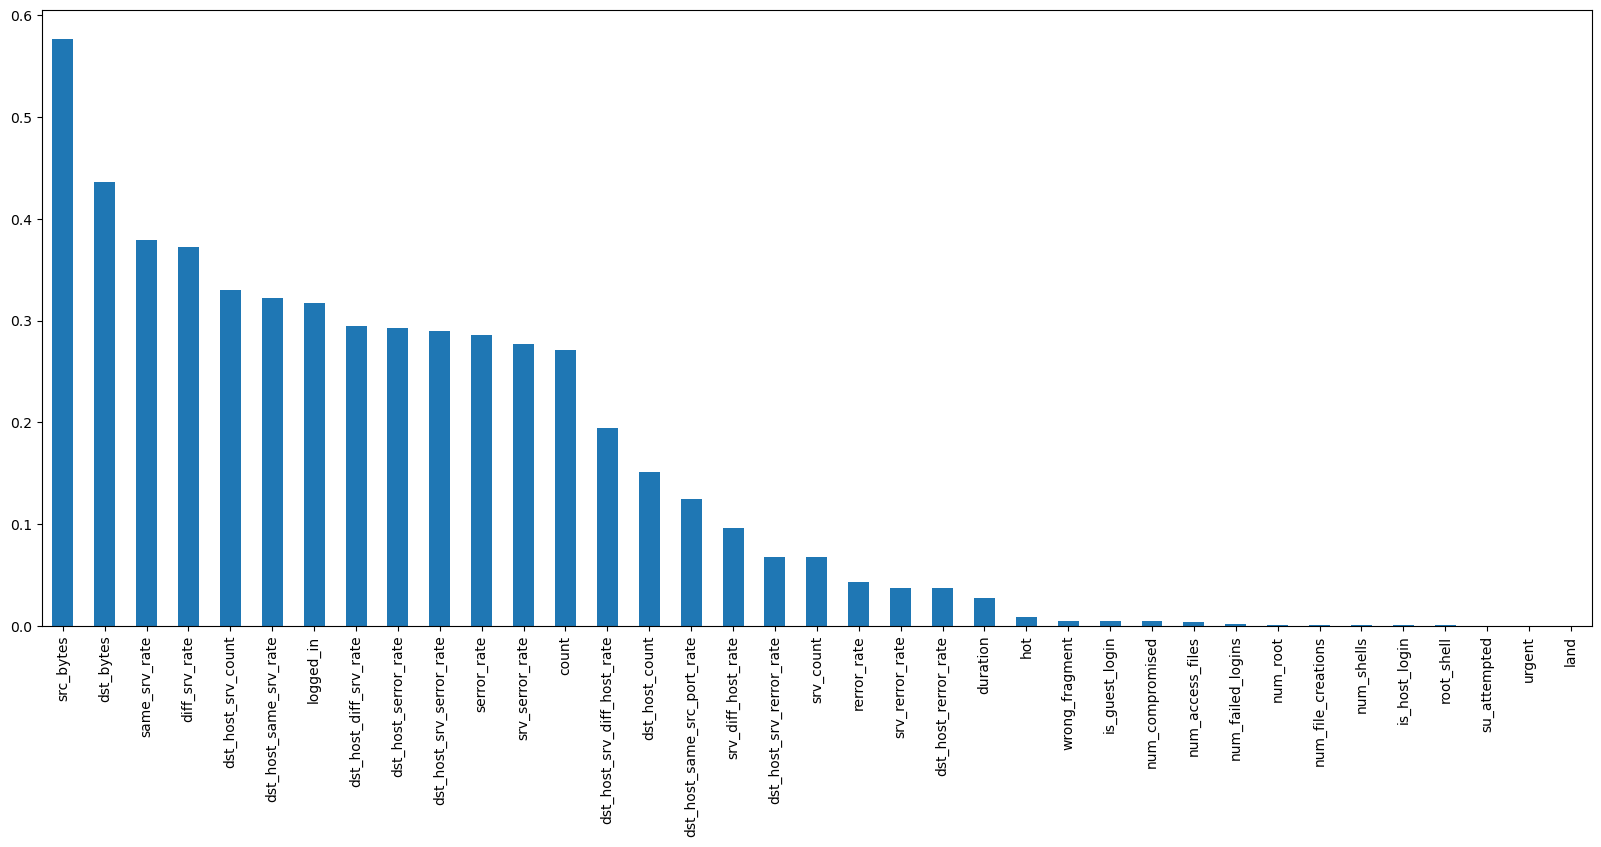

In [7]:
# making the graph to see the realtion visually 
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [8]:
# Create a SelectKBest object with mutual_info_classif as the scoring function and select top 20 features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)

# Fit the SelectKBest object on the training data to select the top 20 highly related features
sel_five_cols.fit(X_train, y_train)

# Get the names of the columns that were selected by the SelectKBest object
selected_columns = X_train.columns[sel_five_cols.get_support()]


In [9]:
# Selecting the top 20 columns of the dataset 
X_train = df_train[['logged_in', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']]

In [10]:
# Create a MinMaxScaler object for feature scaling
scaler1 = MinMaxScaler()

# Use the MinMaxScaler to scale the features in X_train to a specific range (usually between 0 and 1)
df_minmax = scaler1.fit_transform(X_train)

# Create a new DataFrame 'X_train' with the scaled features and the same column names
X_train = pd.DataFrame(df_minmax, columns=(X_train.columns))

# Display the scaled 'X_train' DataFrame
X_train


,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.00
1,0.0,0.025440,0.0,0.0,0.08,0.15,0.00,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00
2,0.0,0.240705,1.0,0.0,0.05,0.07,0.00,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00
3,1.0,0.009785,0.2,0.0,1.00,0.00,0.00,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.01
4,1.0,0.058708,0.0,0.0,1.00,0.00,0.09,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.360078,1.0,0.0,0.14,0.06,0.00,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00
125969,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00
125970,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.00
125971,0.0,0.281800,1.0,0.0,0.06,0.05,0.00,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00


In [11]:
# Create a OneHotEncoder object with 'ignore' strategy for handling unknown categories
ohe = OneHotEncoder(handle_unknown='ignore') 

# Apply one-hot encoding to the categorical columns (protocol_type, service, flag) in df_train
label_enc = ohe.fit_transform(df_train.iloc[:, 1:4])

# Convert the one-hot encoded sparse matrix to an array
label_enc_array = label_enc.toarray()

# Get the feature names after one-hot encoding
new_labels = ohe.get_feature_names_out(['protocol_type', 'service', 'flag'])

# Create a DataFrame 'df_enc' with the one-hot encoded features and new column names
df_enc = pd.DataFrame(data=label_enc_array, columns=new_labels)

# Concatenate the original scaled features (X_train) and the one-hot encoded features (df_enc)
X_train = pd.concat([X_train, df_enc], axis=1)

# Display the final 'X_train' DataFrame with scaled and one-hot encoded features
X_train


,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.098039,0.17,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.025440,0.0,0.0,0.08,0.15,0.00,0.003922,0.00,0.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.240705,1.0,0.0,0.05,0.07,0.00,0.101961,0.10,0.05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.009785,0.2,0.0,1.00,0.00,0.00,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.058708,0.0,0.0,1.00,0.00,0.09,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,0.360078,1.0,0.0,0.14,0.06,0.00,0.098039,0.10,0.06,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,0.0,0.003914,0.0,0.0,1.00,0.00,0.00,0.956863,0.96,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.117647,0.12,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0.0,0.281800,1.0,0.0,0.06,0.05,0.00,0.031373,0.03,0.05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Convert the attack labels in the test set to binary labels: 1 for DOS/probe attacks and 0 for others
y_test = np.array([1 if x in dos_probe_list else 0 for x in df_test['label']])

# Drop the 'label' column from the test set
df_test = df_test.drop(['label'], axis=1)

# Reset the index of the test set DataFrame and drop the old index column
df_test = df_test.reset_index().drop(['index'], axis=1)

# Display the modified test set DataFrame
df_test


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [13]:
X_test = df_test[['logged_in', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']]

In [14]:
# Use the MinMaxScaler to scale the features in X_test based on the scaling parameters from the training data
df_minmax = scaler1.transform(X_test)

# Create a new DataFrame 'X_test' with the scaled features and the same column names
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))

# Display the scaled 'X_test' DataFrame
X_test


,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,0.0,0.448141,0.0,1.0,0.04,0.06,0.00,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00
1,0.0,0.266145,0.0,1.0,0.01,0.06,0.00,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00
2,0.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00
3,0.0,0.001957,0.0,0.0,1.00,0.00,1.00,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00
4,0.0,0.001957,0.0,1.0,1.00,0.00,0.75,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00
22540,1.0,0.003914,0.0,0.0,1.00,0.00,0.18,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00
22541,1.0,0.009785,0.0,0.0,1.00,0.00,0.20,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07
22542,0.0,0.007828,0.0,0.0,1.00,0.00,0.33,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00


In [15]:
# Apply one-hot encoding to the categorical columns (protocol_type, service, flag) in df_test using the same encoder 'ohe'
label_enc = ohe.transform(df_test.iloc[:, 1:4])

# Convert the one-hot encoded sparse matrix to an array
label_enc_array = label_enc.toarray()

# Get the feature names after one-hot encoding
new_labels = ohe.get_feature_names_out(['protocol_type', 'service', 'flag'])

# Create a DataFrame 'df_enc' with the one-hot encoded features and new column names
df_enc = pd.DataFrame(data=label_enc_array, columns=new_labels)

# Concatenate the original scaled and one-hot encoded features (X_test and df_enc) for the test set
X_test = pd.concat([X_test, df_enc], axis=1)

# Display the final 'X_test' DataFrame with scaled and one-hot encoded features for the test set
X_test


,logged_in,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.448141,0.0,1.0,0.04,0.06,0.00,0.039216,0.04,0.06,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.266145,0.0,1.0,0.01,0.06,0.00,0.003922,0.00,0.06,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.337255,0.61,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.001957,0.0,0.0,1.00,0.00,1.00,0.223529,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.001957,0.0,1.0,1.00,0.00,0.75,0.337255,0.31,0.17,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.001957,0.0,0.0,1.00,0.00,0.00,0.552941,0.72,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,1.0,0.003914,0.0,0.0,1.00,0.00,0.18,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,1.0,0.009785,0.0,0.0,1.00,0.00,0.20,1.000000,1.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22542,0.0,0.007828,0.0,0.0,1.00,0.00,0.33,0.988235,0.99,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Print the shape (dimensions) of the training feature matrix 'X_train'
print(X_train.shape)

# Print the shape (dimensions) of the training target vector 'y_train'
print(y_train.shape)

# Print the shape (dimensions) of the test feature matrix 'X_test'
print(X_test.shape)

# Print the shape (dimensions) of the test target vector 'y_test'
print(y_test.shape)


(125973, 99)
(125973,)
(22544, 99)
(22544,)


# *****Evaluate classifier's performance using GaussianNB 

In [17]:
# Create a PCA (Principal Component Analysis) object with n_components set to capture 95% of MLE
pca_dos_probe = PCA(n_components=0.95)

# Perform PCA transformation on the training data 'X_train' to retain components that capture 95% of variance
X_train_dos_probe = pca_dos_probe.fit_transform(X_train)

# Transform the test data 'X_test' using the same PCA transformation obtained from the training data
X_test_dos_probe = pca_dos_probe.transform(X_test)

# Create a Gaussian Naive Bayes classifier object
dos_probe_classifier = GaussianNB()

# Fit the Gaussian Naive Bayes classifier using the PCA-transformed training data
dos_probe_classifier.fit(X_train_dos_probe, y_train)

# Predict the labels for the PCA-transformed test data
predicted = dos_probe_classifier.predict(X_test_dos_probe)

# Print the confusion matrix to evaluate the classifier's performance
print(confusion_matrix(y_test, predicted))

# Print the accuracy score
print('Accuracy =', accuracy_score(y_test, predicted))

# Print the F1 score
print('F1 Score =', f1_score(y_test, predicted))

# Print the precision score
print('Precision =', precision_score(y_test, predicted))

# Print the recall score
print('Recall =', recall_score(y_test, predicted))

# Print the shape of the transformed training data after PCA
print(X_train_dos_probe.shape)


[[9544 3119]
 [1234 8647]]
Accuracy = 0.8069109297374024
F1 Score = 0.7989097796461403
Precision = 0.7349141594424613
Recall = 0.8751138548729885
(125973, 29)


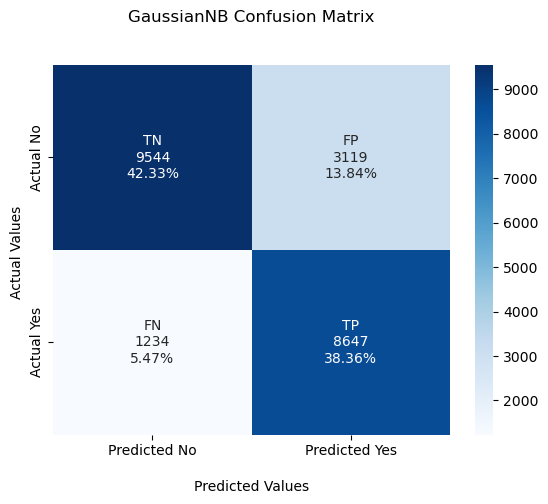

In [18]:
gaussian_matrix = confusion_matrix(y_test, predicted)
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                gaussian_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     gaussian_matrix.flatten()/np.sum(gaussian_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(gaussian_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('GaussianNB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Predicted No','Predicted Yes'])
ax.yaxis.set_ticklabels(['Actual No','Actual Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
df_train = copy.deepcopy(df_train_original)
df_test = copy.deepcopy(df_test_original)

# Method 2

In [20]:
# Filter the training data to include only targeted attacks (non-normal classes)
df_train = df_train[(df_train['label']=='normal') | (df_train['label']=='guess_passwd') 
                    | (df_train['label']=='ftp_write')
                    | (df_train['label']=='imap') | (df_train['label']=='xsnoop') | (df_train['label']=='phf')
                    | (df_train['label']=='multihop') | (df_train['label']=='warezmaster') 
                    | (df_train['label']=='xlock')
                    | (df_train['label']=='snmpguess') | (df_train['label']=='snmpgetattack') 
                    | (df_train['label']=='httptunnel')
                    | (df_train['label']=='sendmail') | (df_train['label']=='named') 
                    | (df_train['label']=='spy') 
                    | (df_train['label']=='warezclient') | (df_train['label']=='buffer_overflow') 
                    | (df_train['label']=='loadmodule') | (df_train['label']=='rootkit')
                    | (df_train['label']=='perl') | (df_train['label']=='xterm') 
                    | (df_train['label']=='sqlattack')
                    | (df_train['label']=='ps')]

# Convert attack labels to binary: 0 for 'normal' and 1 for targeted attacks
y_train = np.array([0 if x=='normal' else 1 for x in df_train['label']])

# Drop the 'label' column from the filtered training data
df_train = df_train.drop(['label'], axis=1)

# Reset the index of the filtered training data DataFrame and drop the old index column
df_train = df_train.reset_index().drop(['index'], axis=1)

# Display the filtered training data DataFrame containing only targeted attacks
df_train


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,tcp,http,SF,287,2251,0,0,0,0,...,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68385,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1,2,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
68386,0,tcp,http,SF,359,375,0,0,0,0,...,3,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
68387,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
68388,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00


In [21]:
# Drop categorical columns 'protocol_type', 'service', and 'flag' from the filtered training data
X_train = df_train.drop(['protocol_type', 'service', 'flag'], axis=1)

# Calculate the mutual information between each feature in X_train and the target variable y_train
mutual_info = mutual_info_classif(X_train, y_train)

# Convert the mutual_info array into a Pandas Series and set the index to column names
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

# Sort the mutual_info Series in descending order to understand feature importance based on correlation
mutual_info.sort_values(ascending=False)


src_bytes                      0.052597
dst_bytes                      0.034321
dst_host_srv_count             0.027115
hot                            0.023225
dst_host_same_src_port_rate    0.019459
logged_in                      0.015040
srv_count                      0.014035
dst_host_srv_diff_host_rate    0.013953
dst_host_count                 0.013663
count                          0.012538
same_srv_rate                  0.011173
duration                       0.010682
is_guest_login                 0.010563
dst_host_same_srv_rate         0.009097
srv_diff_host_rate             0.006527
dst_host_diff_srv_rate         0.005262
dst_host_rerror_rate           0.003436
dst_host_srv_serror_rate       0.002748
dst_host_serror_rate           0.001872
num_failed_logins              0.001568
root_shell                     0.001301
dst_host_srv_rerror_rate       0.001195
diff_srv_rate                  0.001077
num_shells                     0.001059
serror_rate                    0.000629


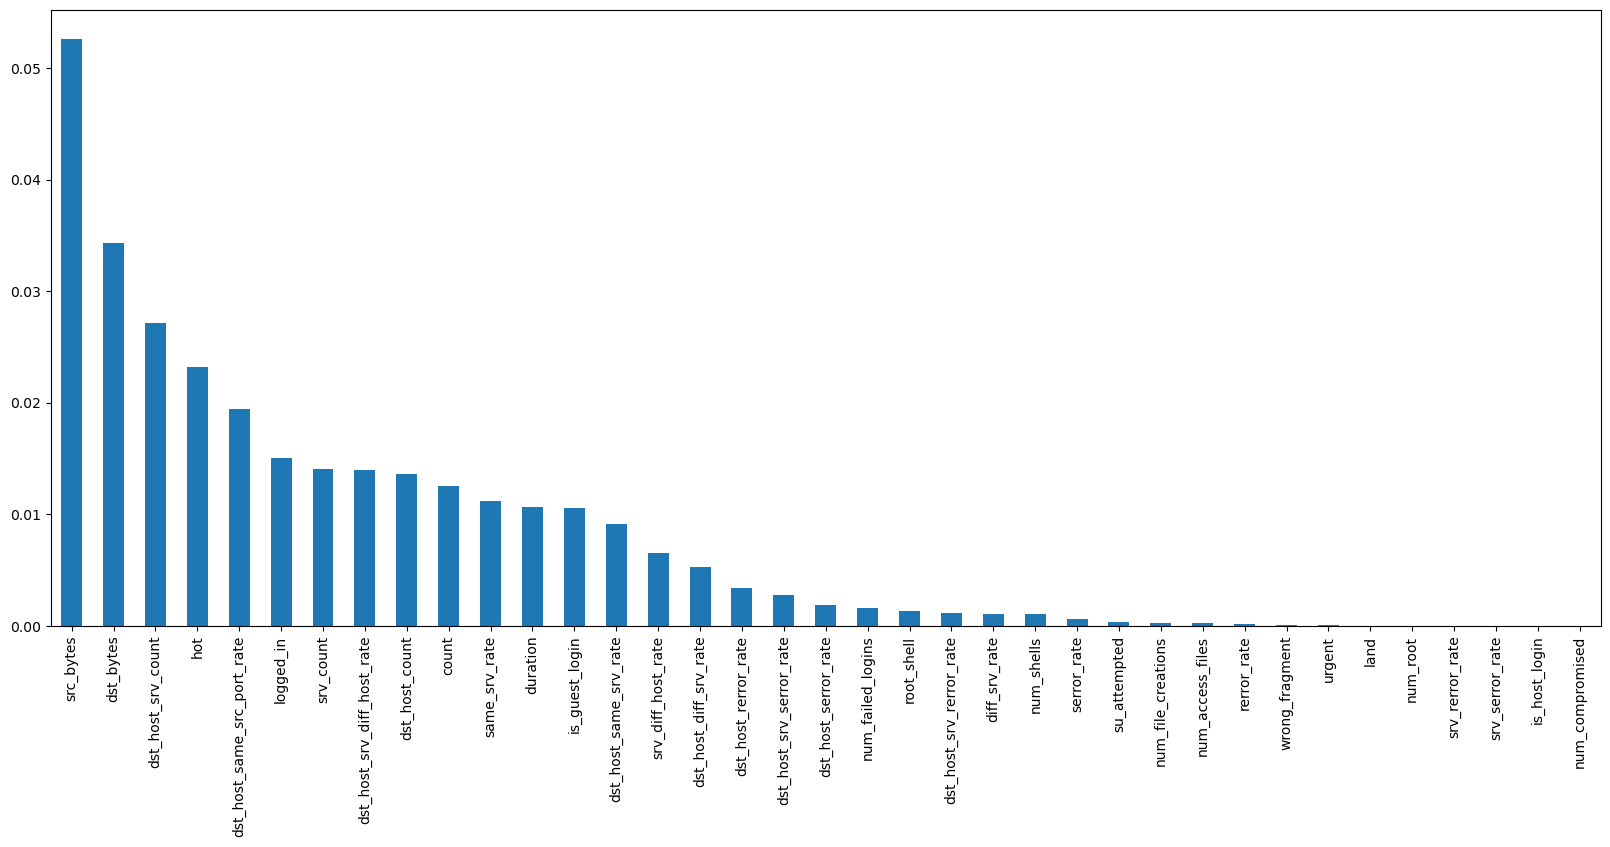

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [23]:
# Create a SelectKBest object with mutual_info_classif as the scoring function and select top 20 features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)

# Fit the SelectKBest object on the filtered training data to select the top 20 highly related features
sel_five_cols.fit(X_train, y_train)

# Get the names of the columns that were selected by the SelectKBest object
selected_columns = X_train.columns[sel_five_cols.get_support()]


In [24]:
X_train = df_train[['srv_count','hot', 'logged_in', 'is_guest_login', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']]

In [25]:
scaler2 = MinMaxScaler()
df_minmax = scaler2.fit_transform(X_train)
X_train = pd.DataFrame(df_minmax, columns=(X_train.columns))
X_train

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.003914,0.0,0.0,0.0,0.00,0.588235,0.098039,0.17,0.00
1,0.001957,0.0,0.0,0.0,0.00,1.000000,0.003922,0.88,0.00
2,0.009785,0.0,1.0,0.0,0.00,0.117647,1.000000,0.03,0.04
3,0.062622,0.0,1.0,0.0,0.09,1.000000,1.000000,0.00,0.00
4,0.013699,0.0,1.0,0.0,0.43,0.031373,0.858824,0.12,0.03
...,...,...,...,...,...,...,...,...,...
68385,0.001957,0.0,1.0,0.0,0.00,0.003922,0.007843,1.00,1.00
68386,0.021526,0.0,1.0,0.0,0.18,0.011765,1.000000,0.33,0.04
68387,0.003914,0.0,0.0,0.0,0.00,1.000000,0.956863,0.01,0.00
68388,0.001957,0.0,1.0,0.0,0.00,1.000000,0.117647,0.00,0.00


In [26]:
# perform One-hot encoding
ohe2 = OneHotEncoder(handle_unknown='ignore')
label_enc = ohe2.fit_transform(df_train.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe2.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_train = pd.concat([X_train, df_enc], axis=1)
#df_train = df_train.drop(['protocol_type','service','flag'], axis=1)
X_train

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_icmp,...,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.003914,0.0,0.0,0.0,0.00,0.588235,0.098039,0.17,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.001957,0.0,0.0,0.0,0.00,1.000000,0.003922,0.88,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.009785,0.0,1.0,0.0,0.00,0.117647,1.000000,0.03,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.062622,0.0,1.0,0.0,0.09,1.000000,1.000000,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.013699,0.0,1.0,0.0,0.43,0.031373,0.858824,0.12,0.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68385,0.001957,0.0,1.0,0.0,0.00,0.003922,0.007843,1.00,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68386,0.021526,0.0,1.0,0.0,0.18,0.011765,1.000000,0.33,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68387,0.003914,0.0,0.0,0.0,0.00,1.000000,0.956863,0.01,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68388,0.001957,0.0,1.0,0.0,0.00,1.000000,0.117647,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# do the same for testset
df_test = df_test[(df_test['label']=='normal') | (df_test['label']=='guess_passwd') | (df_test['label']=='ftp_write')
                    | (df_test['label']=='imap') | (df_test['label']=='xsnoop') | (df_test['label']=='phf')
                    | (df_test['label']=='multihop') | (df_test['label']=='warezmaster') 
                    | (df_test['label']=='xlock')
                    | (df_test['label']=='snmpguess') | (df_test['label']=='snmpgetattack') 
                    | (df_test['label']=='httptunnel')
                    | (df_test['label']=='sendmail') | (df_test['label']=='named') 
                    | (df_test['label']=='spy') 
                    | (df_test['label']=='warezclient') | (df_test['label']=='buffer_overflow') 
                    | (df_test['label']=='loadmodule') | (df_test['label']=='rootkit')
                    | (df_test['label']=='perl') | (df_test['label']=='xterm') 
                    | (df_test['label']=='sqlattack')
                    | (df_test['label']=='ps')]

y_test = np.array([0 if x=='normal' else 1 for x in df_test['label']])
df_test = df_test.drop(['label'],axis=1)
df_test = df_test.reset_index().drop(['index'], axis=1)
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00
1,0,tcp,http,SF,267,14515,0,0,0,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00
2,0,tcp,smtp,SF,1022,387,0,0,0,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04
3,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
4,0,tcp,http,SF,327,467,0,0,0,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12658,0,tcp,http,SF,274,1623,0,0,0,0,...,92,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00
12659,0,tcp,http,SF,280,6087,0,0,0,0,...,5,255,1.00,0.00,0.20,0.04,0.00,0.00,0.00,0.00
12660,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
12661,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00


In [28]:
X_test = df_test[['srv_count','hot', 'logged_in', 'is_guest_login', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']]

In [29]:
df_minmax = scaler2.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))
X_test

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.001957,0.0,0.0,0.0,0.00,0.525490,0.337255,0.61,0.02
1,0.007828,0.0,1.0,0.0,0.00,0.607843,1.000000,0.01,0.03
2,0.005871,0.0,1.0,0.0,1.00,1.000000,0.109804,0.00,0.00
3,0.001957,0.0,0.0,0.0,0.00,1.000000,1.000000,0.00,0.00
4,0.091977,0.0,1.0,0.0,0.04,0.592157,1.000000,0.01,0.03
...,...,...,...,...,...,...,...,...,...
12658,0.001957,0.0,1.0,0.0,0.00,0.360784,1.000000,0.01,0.04
12659,0.005871,0.0,1.0,0.0,0.00,0.019608,1.000000,0.20,0.04
12660,0.001957,0.0,1.0,0.0,0.00,0.392157,0.552941,0.01,0.01
12661,0.021526,0.0,1.0,0.0,0.18,0.772549,1.000000,0.01,0.01


In [30]:
label_enc = ohe2.transform(df_test.iloc[:,1:4])
label_enc.toarray()
new_labels = ohe2.get_feature_names_out(['protocol_type', 'service', 'flag'])
df_enc = pd.DataFrame(data=label_enc.toarray(), columns=new_labels)
X_test = pd.concat([X_test, df_enc], axis=1)
X_test

,srv_count,hot,logged_in,is_guest_login,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_icmp,...,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.001957,0.0,0.0,0.0,0.00,0.525490,0.337255,0.61,0.02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.007828,0.0,1.0,0.0,0.00,0.607843,1.000000,0.01,0.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.005871,0.0,1.0,0.0,1.00,1.000000,0.109804,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.001957,0.0,0.0,0.0,0.00,1.000000,1.000000,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.091977,0.0,1.0,0.0,0.04,0.592157,1.000000,0.01,0.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12658,0.001957,0.0,1.0,0.0,0.00,0.360784,1.000000,0.01,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12659,0.005871,0.0,1.0,0.0,0.00,0.019608,1.000000,0.20,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12660,0.001957,0.0,1.0,0.0,0.00,0.392157,0.552941,0.01,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12661,0.021526,0.0,1.0,0.0,0.18,0.772549,1.000000,0.01,0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(68390, 49)
(68390,)
(12663, 49)
(12663,)


# Evaluate classifier's performance using SVC

In [32]:
# Perform random under-sampling with a sampling strategy of 1 (balance classes)
sm = under_sam(sampling_strategy=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Apply KernelPCA with RBF kernel and reduce the dimensions to 2
kpca_r2l_u2r = KernelPCA(n_components=2, kernel="rbf")
X_train_r2l_u2r = kpca_r2l_u2r.fit_transform(X_train)
X_test_r2l_u2r = kpca_r2l_u2r.transform(X_test)

# Create an SVC (Support Vector Classifier) with specified hyperparameters
r2l_u2r_classifier = SVC(C=0.1, gamma=0.01, kernel='rbf')

# Fit the SVC on the reduced-dimension training data
r2l_u2r_classifier.fit(X_train_r2l_u2r, y_train)

# Predict labels for the reduced-dimension test data
predicted = r2l_u2r_classifier.predict(X_test_r2l_u2r)

# Print the confusion matrix to evaluate the classifier's performance
print(confusion_matrix(y_test, predicted))

# Print the accuracy score
print('Accuracy =', accuracy_score(y_test, predicted))

# Print the F1 score
print('F1 Score =', f1_score(y_test, predicted))

# Print the precision score
print('Precision =', precision_score(y_test, predicted))

# Print the recall score
print('Recall =', recall_score(y_test, predicted))

# Print the shape of the transformed training data after KernelPCA
print(X_train_r2l_u2r.shape)


[[8820  891]
 [1592 1360]]
Accuracy = 0.8039169233199084
F1 Score = 0.5227753219296559
Precision = 0.6041759218125278
Recall = 0.46070460704607047
(2094, 2)


In [33]:
accuracy = accuracy_score(y_test, predicted)
f1_score = f1_score(y_test, predicted)
precision_score = precision_score(y_test, predicted)
recall_score = recall_score(y_test, predicted)

In [34]:
gaussian = {'Accuracy': 0.8069109297374024, 'F1 Score': 0.7989097796461403, 'Precision': 0.7349141594424613, 'Recall': 0.8751138548729885}
svc = {'Accuracy': 0.8043907446892522, 'F1 Score': 0.5187487857004079, 'Precision': 0.6082004555808656, 'Recall': 0.45223577235772355}
two_layer = {'Accuracy': 0.8773509581263307, 'F1 Score': 0.8952849839045635, 'Precision': 0.8709106984969054, 'Recall': 0.9210628847502532}

In [35]:
gaussian = (0.8069109297374024, 0.7989097796461403, 0.7349141594424613, 0.8751138548729885)
svc = (0.8043907446892522, 0.5187487857004079, 0.6082004555808656, 0.45223577235772355)
two_layer = (0.8773509581263307, 0.8952849839045635, 0.8709106984969054, 0.9210628847502532)

In [36]:
xpos = np.arange(len(gaussian))
xpos

array([0, 1, 2, 3])

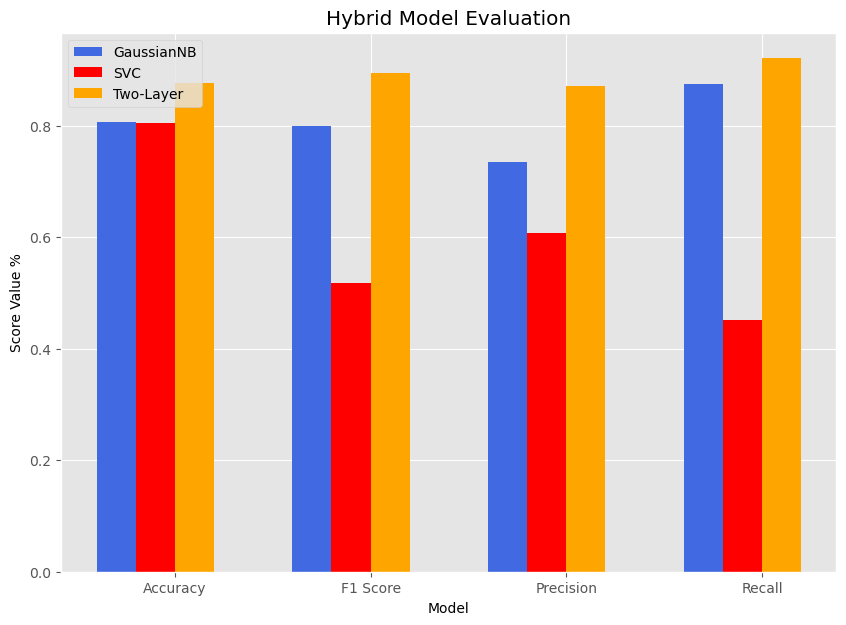

In [37]:
# model_type = list(results_data.keys())
# accuracy = list(results_data.values())
style.use('ggplot')
plt.figure(figsize=(10,7))
# color = ['royalblue', 'red', 'green', 'orange']
barWidth = 0.2
plt.bar(xpos, gaussian, color='royalblue', width=barWidth, label='GaussianNB')
plt.bar(xpos+0.2, svc, color='red', width=barWidth, label='SVC')
plt.bar(xpos+0.4, two_layer, color='orange', width=barWidth, label='Two-Layer')
plt.xticks(xpos+0.3, ('Accuracy','F1 Score', 'Precision', 'Recall') )
plt.xlabel('Model')
plt.ylabel('Score Value %')
plt.title('Hybrid Model Evaluation')
plt.legend()

In [38]:
models = ("GaussianNB", "SVC", "Our Two-Layer")
score_value = {
    'Accuracy': (80.69, 80.43, 87.73),
    'F1 Score': (79.89, 51.87, 89.52),
    'Precision': (73.49, 60.82, 87.09),
    'Recall': (87.51, 45.22,92.10),
}

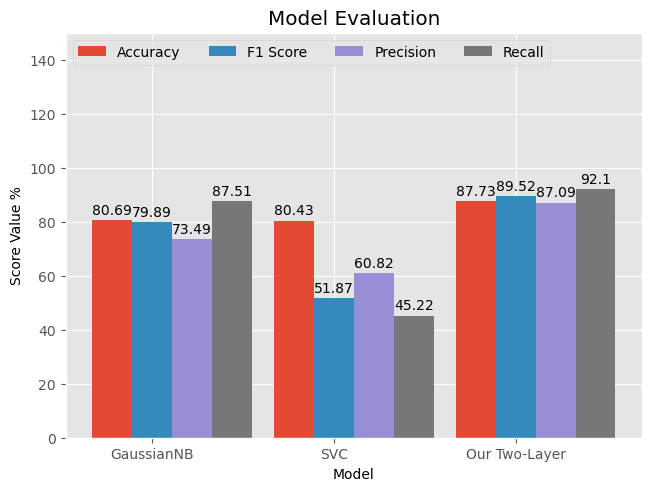

In [39]:
x = np.arange(len(models))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in score_value.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score Value %')
ax.set_title('Model Evaluation')
ax.set_xticks(x + width, models)
ax.set_xlabel('Model')
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 150)


plt.show()

In [40]:
score_type = ["precision_score", "f1_score" , "recall","accuracy","precision_score", "f1_score" , "recall","accuracy","precision_score", "f1_score" , "recall","accuracy"]
score_values = [0.878,0.903,0.928,0.886,0.658,0.526,0.438,0.816,0.735,0.799,0.875,0.807]
model_type = ["TwoLayers","TwoLayers","TwoLayers","TwoLayers","SVC","SVC","SVC","SVC","GaussianNB","GaussianNB","GaussianNB","GaussianNB"]
df = pd.DataFrame()
df["model_type"]= model_type
df["score_type"] = score_type
df["score_values"] = score_values
df["score_values"] = df["score_values"]*100
df.head()

,model_type,score_type,score_values
0,TwoLayers,precision_score,87.8
1,TwoLayers,f1_score,90.3
2,TwoLayers,recall,92.8
3,TwoLayers,accuracy,88.6
4,SVC,precision_score,65.8


In [65]:
score_type = ["accuracy","accuracy","accuracy"]
score_values = [0.886,0.816,0.807]
model_type = ["TwoLayers","SVC","GaussianNB"]
df = pd.DataFrame()
df["model_type"]= model_type
df["score_type"] = score_type
df["score_values"] = score_values
df["score_values"] = df["score_values"]*100
df.head()

,model_type,score_type,score_values
0,TwoLayers,accuracy,88.6
1,SVC,accuracy,81.6
2,GaussianNB,accuracy,80.7


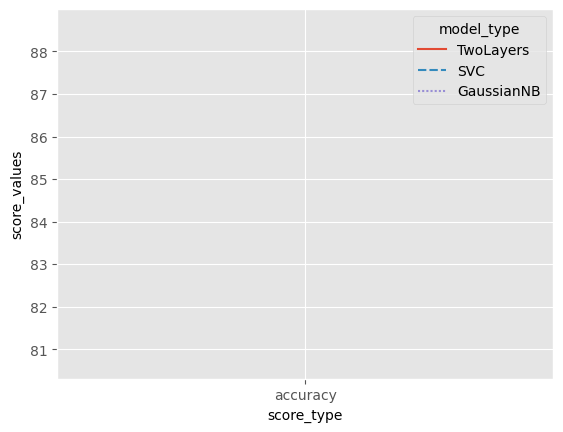

In [66]:
g = sns.lineplot(data=df, x="score_type", y="score_values", hue="model_type", style="model_type")
  
plt.show()

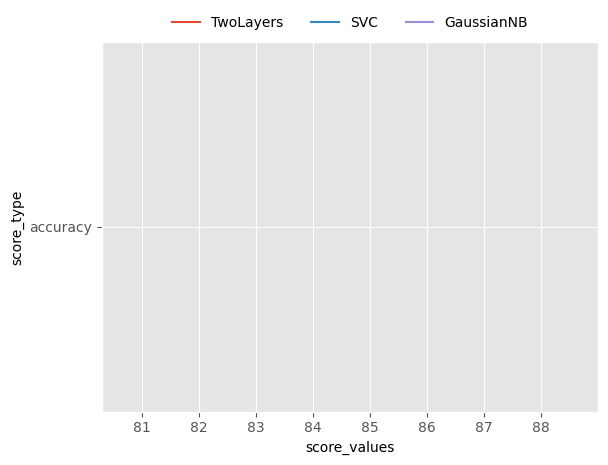

In [43]:
g = sns.lineplot(data=df , x= "score_values" , y="score_type" , hue="model_type" )
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Text(0.5, 1.0, 'Detection Rate')

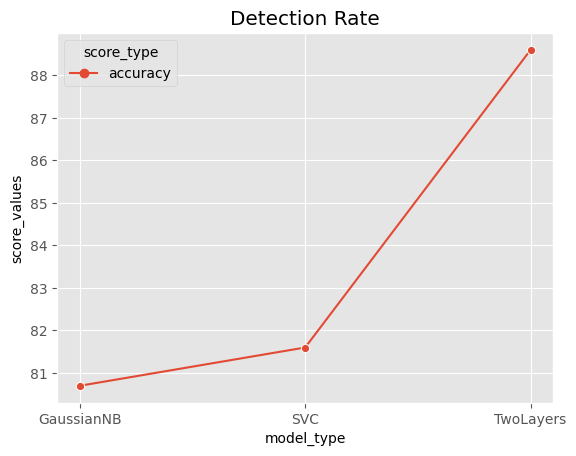

In [72]:
sns.lineplot(data = df.sort_values(by = "model_type") , x= "model_type" , y= "score_values" , hue = "score_type" ,style="score_type", markers=True)
plt.title('Detection Rate')

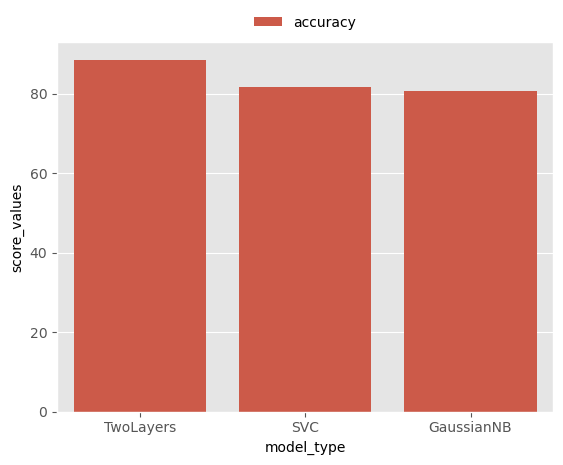

In [44]:
g = sns.barplot(data=df , x= "model_type" , y="score_values" , hue="score_type" )
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

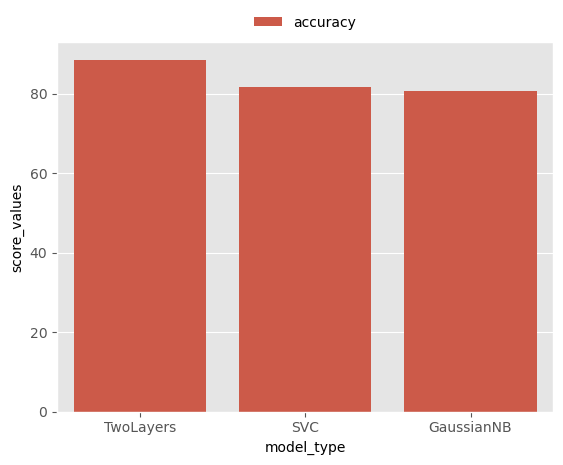

In [45]:
g = sns.barplot(data=df , x= "model_type" , y="score_values" , hue="score_type" )
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

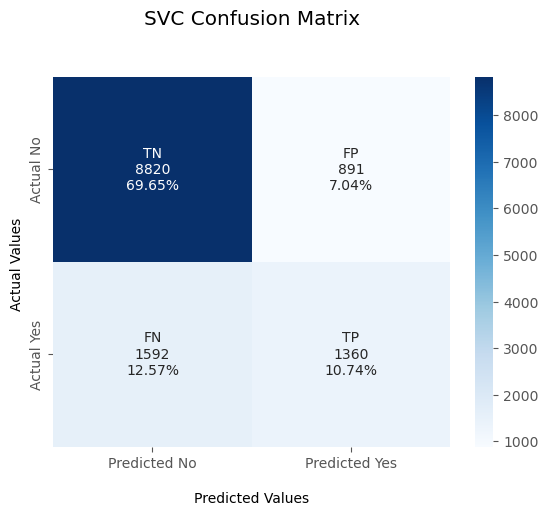

In [46]:
svc_matrix = confusion_matrix(y_test, predicted)
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                svc_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     svc_matrix.flatten()/np.sum(svc_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(svc_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('SVC Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Predicted No','Predicted Yes'])
ax.yaxis.set_ticklabels(['Actual No','Actual Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

# From which section Method 3 starts?

In [47]:
# Create deep copies of the original test DataFrame using the 'copy' module
df_test1 = copy.deepcopy(df_test_original)
df_test2 = copy.deepcopy(df_test_original)

# Convert attack labels to binary: 0 for 'normal' and 1 for attacks
y_test_real = np.array([0 if x=='normal' else 1 for x in df_test1['label']])



In [48]:
# Select the desired columns from the copied test DataFrame
X_test = df_test1[['logged_in', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']]

# Use the MinMaxScaler to scale the selected columns in X_test based on the scaling parameters from training data
df_minmax = scaler1.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))

# Apply one-hot encoding to the categorical columns in df_test1 using the same encoder 'ohe'
label_enc = ohe.transform(df_test1.iloc[:, 1:4])

# Convert the one-hot encoded sparse matrix to an array
label_enc_array = label_enc.toarray()

# Get the feature names after one-hot encoding
new_labels = ohe.get_feature_names_out(['protocol_type', 'service', 'flag'])

# Create a DataFrame 'df_enc' with the one-hot encoded features and new column names
df_enc = pd.DataFrame(data=label_enc_array, columns=new_labels)

# Concatenate the scaled and one-hot encoded features for the test set
X_test = pd.concat([X_test, df_enc], axis=1)

# Transform the test data using the previously fitted PCA transformation for layer 1
X_test_layer1 = pca_dos_probe.transform(X_test)

# Print the shape of the transformed test data after the first layer of PCA
print(X_test_layer1.shape)


(22544, 29)


In [49]:
# Select the desired columns from the second copied test DataFrame
X_test = df_test2[['srv_count', 'hot', 'logged_in', 'is_guest_login', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']]

# Use the MinMaxScaler to scale the selected columns in X_test based on the scaling parameters from training data
df_minmax = scaler2.transform(X_test)
X_test = pd.DataFrame(df_minmax, columns=(X_test.columns))

# Apply one-hot encoding to the categorical columns in df_test2 using the second encoder 'ohe2'
label_enc = ohe2.transform(df_test2.iloc[:, 1:4])

# Convert the one-hot encoded sparse matrix to an array
label_enc_array = label_enc.toarray()

# Get the feature names after one-hot encoding
new_labels = ohe2.get_feature_names_out(['protocol_type', 'service', 'flag'])

# Create a DataFrame 'df_enc' with the one-hot encoded features and new column names
df_enc = pd.DataFrame(data=label_enc_array, columns=new_labels)

# Concatenate the scaled and one-hot encoded features for the second layer of test data
X_test = pd.concat([X_test, df_enc], axis=1)

# Transform the test data using the previously fitted KernelPCA transformation for the second layer
X_test_layer2 = kpca_r2l_u2r.transform(X_test)

# Print the shape of the transformed test data after the second layer of KernelPCA
print(X_test_layer2.shape)


(22544, 2)


In [50]:
# Assign the Gaussian Naive Bayes classifier to 'classifier1'
classifier1 = dos_probe_classifier

# Assign the Support Vector Classifier to 'classifier2'
classifier2 = r2l_u2r_classifier


In [51]:
# Initialize an empty list to store the results
result = []

# Loop through the test samples (22544 samples)
for i in range(22544):
    # Predict using the first classifier (dos_probe_classifier) on the first layer transformed data
    layer1 = classifier1.predict(X_test_layer1[i].reshape(1, -1))[0]
    
    # If the prediction from the first layer is 1, add it to the result list
    if layer1 == 1:
        result.append(layer1)
    else:
        # If the prediction from the first layer is 0, predict using the second classifier (r2l_u2r_classifier)
        layer2 = classifier2.predict(X_test_layer2[i].reshape(1, -1))[0]
        
        # If the prediction from the second layer is 1, add it to the result list
        if layer2 == 1:
            result.append(layer2)
        else:
            # If both layers predict 0, add 0 to the result list
            result.append(0)

# Convert the result list to a numpy array
result = np.array(result)

# Display the result array
result


array([1, 1, 1, ..., 0, 0, 1])

In [52]:
# Print the confusion matrix to evaluate the classifier's performance
print(confusion_matrix(y_test_real, result))

# Print the accuracy score
print('Accuracy =', accuracy_score(y_test_real, result))

# Print the F1 score
print('F1 Score =', f1_score(y_test_real, result))

# Print the precision score
print('Precision =', precision_score(y_test_real, result))

# Print the recall score
print('Recall =', recall_score(y_test_real, result))


[[ 7830  1881]
 [  989 11844]]
Accuracy = 0.872693399574166


TypeError: 'numpy.float64' object is not callable

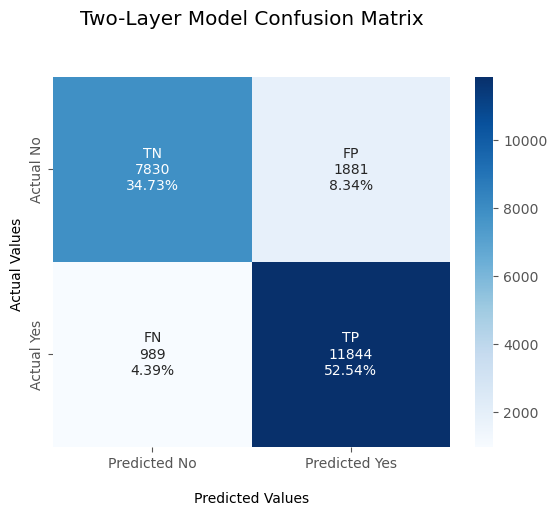

In [53]:
two_layer_matrix = confusion_matrix(y_test_real, result)
group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                two_layer_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     two_layer_matrix.flatten()/np.sum(two_layer_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(two_layer_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Two-Layer Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Predicted No','Predicted Yes'])
ax.yaxis.set_ticklabels(['Actual No','Actual Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
# Load the test dataset from a CSV file
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None)

# Remove the last column (label) to keep only the feature columns
df_test = df_test[df_test.columns[:-1]]

# Set the column names for the test dataset using the previously loaded 'titles' data
df_test.columns = titles.to_list()

# Store the 'label' column as the target variable 'y_test'
y_test = df_test['label']

# Drop the 'num_outbound_cmds' column from the test dataset
df_test = df_test.drop(['num_outbound_cmds'], axis=1)

# Store the original test dataset for future reference
df_test_original = df_test


In [55]:
# Create an empty list to store new attack types
new_attack = []

# Iterate through the index of attack labels that have counts in the test dataset (excluding 'normal')
for i in df_test_original['label'].value_counts().index.tolist()[1:]:
    # Check if the attack label is not present in the training dataset's attack labels (excluding 'normal')
    if i not in df_train_original['label'].value_counts().index.tolist()[1:]:
        # If not present in training but present in test, add it to the 'new_attack' list
        new_attack.append(i)

# Sort the list of new attack types in alphabetical order
new_attack.sort()

# Display the list of new attack types
new_attack


['apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm']

In [56]:
# Create an empty list to store indices of instances with new attack types
index_of_new_attacks = []

# Iterate through the indices of instances in the test dataset
for i in range(len(df_test_original)):
    # Check if the label of the current instance is in the list of new attack types
    if df_test_original['label'][i] in new_attack:
        # If the label is a new attack type, add its index to the 'index_of_new_attacks' list
        index_of_new_attacks.append(df_test_original.index[i])


In [57]:
len(index_of_new_attacks)

3750

In [58]:
# Add the label 'normal' to the list of new attack types
new_attack.append('normal')

# Display the updated list of new attack types
new_attack


['apache2',
 'httptunnel',
 'mailbomb',
 'mscan',
 'named',
 'processtable',
 'ps',
 'saint',
 'sendmail',
 'snmpgetattack',
 'snmpguess',
 'sqlattack',
 'udpstorm',
 'worm',
 'xlock',
 'xsnoop',
 'xterm',
 'normal']

In [59]:
# Create an empty list to store indices of instances with old (already seen) attack types
index_of_old_attacks = []

# Iterate through the indices of instances in the test dataset
for i in range(len(df_test_original)):
    # Check if the label of the current instance is not in the list of new attack types
    if df_test_original['label'][i] not in new_attack:
        # If the label is an old (already seen) attack type, add its index to the 'index_of_old_attacks' list
        index_of_old_attacks.append(df_test_original.index[i])


In [60]:
len(index_of_old_attacks)


9083

In [61]:
# Print the number of instances with new attack types
print(result[index_of_new_attacks].shape[0])

# Print the sum of predictions (1s) for instances with new attack types
print(result[index_of_new_attacks].sum())

# Calculate and print the ratio of 1s (predicted attacks) to the total instances with new attack types
print(result[index_of_new_attacks].sum() / result[index_of_new_attacks].shape[0])


3750
3224
0.8597333333333333


In [62]:
# Print the number of instances with old attack types
print(result[index_of_old_attacks].shape[0])

# Print the sum of predictions (1s) for instances with old attack types
print(result[index_of_old_attacks].sum())

# Calculate and print the ratio of 1s (predicted attacks) to the total instances with old attack types
print(result[index_of_old_attacks].sum() / result[index_of_old_attacks].shape[0])


9083
8620
0.9490256523175162


In [63]:
# Load the test dataset from a CSV file
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None)

# Remove the last column (label) to keep only the feature columns
df_test = df_test[df_test.columns[:-1]]

# Set the column names for the test dataset using the previously loaded 'titles' data
df_test.columns = titles.to_list()

# Store the 'label' column as the target variable 'y_test'
y_test = df_test['label']

# Drop the 'num_outbound_cmds' column from the test dataset
df_test = df_test.drop(['num_outbound_cmds'], axis=1)

# Store the original test dataset for future reference
df_test_original = df_test

# Store the original test dataset as 'df' for convenience
df = df_test_original

# Create lists of indices for different attack categories
dos_index = df.index[(df['label'] == 'apache2') | (df['label'] == 'back') 
                     | (df['label'] == 'land') | (df['label'] == 'mailbomb') 
                     | (df['label'] == 'neptune') | (df['label'] == 'pod') 
                     | (df['label'] == 'processtable') | (df['label'] == 'smurf') 
                     | (df['label'] == 'teardrop') | (df['label'] == 'udpstorm') 
                     | (df['label'] == 'worm')].tolist()

probe_index = df.index[(df['label'] == 'ipsweep') | (df['label'] == 'mscan') 
                       | (df['label'] == 'nmap') | (df['label'] == 'portsweep') 
                       | (df['label'] == 'saint') | (df['label'] == 'satan')].tolist()

r2l_index = df.index[(df['label'] == 'ftp_write') | (df['label'] == 'guess_passwd') 
                     | (df['label'] == 'httptunnel') | (df['label'] == 'imap') 
                     | (df['label'] == 'multihop') | (df['label'] == 'named') 
                     | (df['label'] == 'phf') | (df['label'] == 'sendmail') 
                     | (df['label'] == 'snmpgetattack') | (df['label'] == 'snmpguess') 
                     | (df['label'] == 'warezmaster') | (df['label'] == 'xlock') 
                     | (df['label'] == 'xsnoop')].tolist()

u2r_index = df.index[(df['label'] == 'buffer_overflow') | (df['label'] == 'loadmodule') 
                       | (df['label'] == 'perl') | (df['label'] == 'ps') 
                       | (df['label'] == 'rootkit') | (df['label'] == 'sqlattack')
                       | (df['label'] == 'xterm')].tolist()

# Calculate and print the ratios of predicted attacks for different attack categories
print("dos:", result[dos_index].sum() / result[dos_index].shape[0])
print("probe:", result[probe_index].sum() / result[probe_index].shape[0])
print("r2l:", result[r2l_index].sum() / result[r2l_index].shape[0])
print("u2r:", result[u2r_index].sum() / result[u2r_index].shape[0])


dos: 0.8943699731903485
probe: 0.922759190417183
r2l: 0.9965337954939342
u2r: 0.9402985074626866
